# P5

## Q1
P5delta

Gary Watson

Alex Hromada

Ethan Matzdorf

CS4821

In [1]:
from os import listdir
from os.path import isfile, join
import nltk
import string
from nltk.corpus import PlaintextCorpusReader
from itertools import chain
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
%matplotlib inline


## Q4(a)

In [2]:
colleges = pd.read_csv("college_data.csv");
collegePCA = PCA()
collegePCA.fit(colleges.iloc[:,3:21])

collegePCAComps = pd.DataFrame(collegePCA.components_)
collegePCAComps.columns = ['Early Career Pay', 'Mid-Career Pay',
'Total price for in-district students living on campus  2015-16 (DRVIC2015)',
'Professors (S2014_SIS_RV  With faculty status  tenured)',
'Associate professors (S2014_SIS_RV  With faculty status  tenured)',
'Assistant professors (S2014_SIS_RV  With faculty status  on tenure track)',
'Average salary equated to 9 months of full-time instructional staff - professors (DRVHR2014_RV)',
'Average salary equated to 9 months of full-time instructional staff - associate professors (DRVHR2014_RV)',
'Average salary equated to 9 months of full-time instructional staff - assistant professors (DRVHR2014_RV)',
'Percent admitted - men (DRVADM2014_RV)', 'Percent admitted - women (DRVADM2014_RV)',
'Percent admitted - total (DRVADM2014_RV)', 'Full-time retention rate  2014 (EF2014D_RV)',
'Student-to-faculty ratio (EF2014D_RV)',
'Percent of total enrollment that are women (DRVEF2014_RV)', 'Total  enrollment (DRVEF2014_RV)',
'Graduation rate  total cohort (DRVGR2014_RV)',
'Percent of full-time first-time undergraduates awarded Pell grants (SFA1314_RV)']
collegePCAComps.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 
'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 
'PC17', 'PC18']
collegePCAComps

Early Career Pay  Mid-Career Pay  \
PC1           0.178841        0.093246   
PC2          -0.250502        0.053244   
PC3           0.370337        0.707632   
PC4           0.811254       -0.166551   
PC5           0.089659       -0.634980   
PC6           0.285175       -0.233648   
PC7           0.143447       -0.046746   
PC8          -0.001832        0.002773   
PC9          -0.005432        0.001903   
PC10          0.002189       -0.000779   
PC11          0.002129       -0.000085   
PC12         -0.000391       -0.000152   
PC13          0.000018        0.000059   
PC14         -0.000330        0.000027   
PC15         -0.000007       -0.000239   
PC16         -0.000075        0.000007   
PC17          0.000005        0.000012   
PC18         -0.000007       -0.000036   

      Total price for in-district students living on campus  2015-16 (DRVIC2015)  \
PC1                                            0.302823                            
PC2                                           -0.401034                            
PC3                                           -0.556394                            
PC4                                            0.139313                            
PC5                                           -0.621199                            
PC6                                           -0.097155                            
PC7                                            0.152161                            
PC8                                            0.000388                            
PC9                                            0.000612                            
PC10                                          -0.002236                            
PC11                                           0.001047                            
PC12                                          -0.000545                            
PC13                                           0.000015                            
PC14                                           0.000116                            
PC15                                           0.000036                            
PC16                                          -0.000171                            
PC17                                          -0.000186                            
PC18                                           0.000015                            

      Professors (S2014_SIS_RV  With faculty status  tenured)  \
PC1                                            0.004051         
PC2                                            0.015972         
PC3                                           -0.002055         
PC4                                            0.005586         
PC5                                            0.000740         
PC6                                            0.003871         
PC7                                            0.018816         
PC8                                            0.865200         
PC9                                            0.426558         
PC10                                          -0.254163         
PC11                                           0.046831         
PC12                                          -0.015320         
PC13                                          -0.002757         
PC14                                           0.037070         
PC15                                          -0.009320         
PC16                                          -0.016938         
PC17                                          -0.002955         
PC18                                          -0.003184         

      Associate professors (S2014_SIS_RV  With faculty status  tenured)  \
PC1                                            0.000617                   
PC2                                            0.008499                   
PC3                                           -0.002495                   
PC4                                            0.000937                   

## Q4(b)

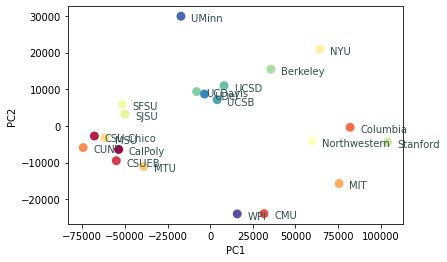

In [3]:
collegeX = collegePCA.transform(colleges.iloc[:,3:21])
collegeXnew = pd.DataFrame(collegeX)
collegeXnew.index = colleges['ShortHandName'].tolist()
collegeXnew.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18']
collegeXPC1PC2 = collegeXnew[['PC1', 'PC2']]


cmap = cm.get_cmap('Spectral')
fig, ax = plt.subplots()
collegeXPC1PC2.plot('PC1', 'PC2', kind='scatter', ax=ax, s=80, linewidth=0,
c=range(len(collegeXPC1PC2)), colormap=cmap)

for k, v in collegeXPC1PC2.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=10, color='darkslategrey')


fig.canvas.draw()
# plt.scatter(collegeX[:,0], collegeX[:,1])
# plt.xlabel('PC1')
# plt.ylabel('PC2')


## Q4(c)

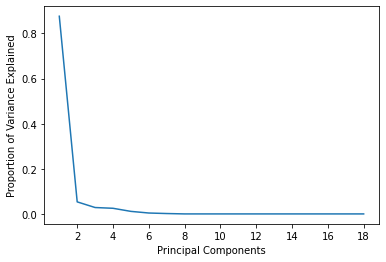

In [4]:
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
collegePCA.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained");
plt.locator_params(axis="x", nbins=18)

7 principal components should be used for any further analysis.

## Q5(a)

In [5]:
stocks = pd.read_csv("stock_data_2020.csv");
stockPCA = PCA()
stockPCA.fit(stocks.iloc[:,1:31])

stockPCAComps = pd.DataFrame(stockPCA.components_)
stockPCAComps.columns = ['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DOW','GS',
'HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE','PG','TRV',
'UNH','V','VZ','WBA','WMT','PFE','RTX','XOM']
stockPCAComps.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
'PC29', 'PC30']
stockPCAComps

AAPL       AXP        BA       CAT      CSCO       CVX       DIS  \
PC1  -0.081667 -0.188198 -0.731751 -0.171934 -0.024492 -0.115333 -0.196808   
PC2  -0.317904  0.018552  0.425004 -0.245184  0.013035  0.097470 -0.113367   
PC3   0.075550  0.059326 -0.064562  0.431697 -0.083859 -0.215654  0.265434   
PC4   0.156389  0.004060  0.263312  0.094141 -0.139608 -0.350425 -0.193075   
PC5   0.350550 -0.055272  0.113980 -0.058345  0.082468 -0.102108  0.278640   
PC6  -0.069634 -0.085303  0.287159 -0.019992 -0.039533 -0.108063 -0.327616   
PC7   0.051717  0.067003  0.055664 -0.162769 -0.040433 -0.172875  0.077114   
PC8  -0.213960  0.363786 -0.107469 -0.138705 -0.073691 -0.145474  0.171300   
PC9   0.364094  0.023553  0.045837 -0.366135 -0.098504  0.071348  0.423536   
PC10  0.029470  0.080928  0.174549  0.176470  0.041217  0.177655 -0.039865   
PC11  0.031278  0.400802 -0.179613  0.090899 -0.010348 -0.045024 -0.295798   
PC12 -0.273769 -0.085935 -0.031228  0.378370  0.063461  0.329492  0.311262   
PC13  0.089500  0.165685 -0.004966  0.270321  0.118706 -0.297195 -0.008225   
PC14 -0.082492 -0.048381 -0.107539  0.030278  0.006631 -0.086212  0.305603   
PC15 -0.152885 -0.057133  0.086914 -0.063793  0.095469 -0.394170  0.224069   
PC16  0.013795  0.141583 -0.009671 -0.235386 -0.040772  0.021204  0.175922   
PC17 -0.223212 -0.074487  0.056968  0.276653  0.041532 -0.170067  0.192722   
PC18  0.164116  0.120819  0.043915  0.211344  0.005629  0.157703 -0.103699   
PC19 -0.503438 -0.237871  0.037252 -0.159740 -0.002158 -0.148287  0.066174   
PC20  0.014650  0.026316  0.007666  0.029186 -0.353399  0.140570 -0.040891   
PC21  0.202459 -0.577157  0.034948  0.085686 -0.282623 -0.207695 -0.109229   
PC22 -0.092201  0.207061  0.003528  0.045572 -0.281192 -0.062311  0.026168   
PC23 -0.025105  0.093261  0.056224 -0.130440 -0.201247  0.062479  0.047685   
PC24  0.126882  0.113074  0.001851 -0.054159  0.118913 -0.117475 -0.043435   
PC25 -0.147492  0.162026  0.040991  0.019622  0.126337 -0.089806 -0.031356   
PC26  0.005447 -0.082650 -0.032627  0.152845 -0.355527  0.287937  0.028063   
PC27 -0.065698  0.166608 -0.011167 -0.058711 -0.466610 -0.089689  0.033559   
PC28  0.023294 -0.154299  0.023569 -0.101687  0.156760  0.262658  0.036897   
PC29  0.118951 -0.012122 -0.021034 -0.026588  0.438068  0.009325 -0.067216   
PC30  0.027231  0.160068 -0.019575 -0.017164  0.005453  0.086967 -0.030853   

           DOW        GS        HD  ...        PG       TRV       UNH  \
PC1  -0.081057 -0.306077 -0.141186  ... -0.058002 -0.166962 -0.174201   
PC2  -0.063959 -0.081335 -0.418346  ... -0.137932 -0.028672 -0.371352   
PC3   0.053003  0.037599 -0.533617  ...  0.056118  0.128147 -0.008263   
PC4   0.019194 -0.372353  0.252379  ...  0.189887 -0.032129 -0.448214   
PC5  -0.013964  0.227422  0.014220  ... -0.123874  0.010239 -0.422110   
PC6  -0.093715 -0.233118  0.003875  ... -0.056489  0.258801  0.536141   
PC7  -0.122426 -0.061753 -0.369255  ...  0.150393 -0.168200  0.077289   
PC8  -0.033421  0.018629  0.141358  ... -0.340678 -0.076094  0.069888   
PC9  -0.096828 -0.292485  0.079014  ...  0.101759 -0.096187  0.222692   
PC10  0.112574 -0.483521 -0.167669  ... -0.048543 -0.406040  0.023923   
PC11  0.073824  0.009155 -0.071067  ...  0.186547  0.256032 -0.112182   
PC12  0.075373 -0.350146  0.275414  ... -0.120179  0.152958 -0.141187   
PC13 -0.021949 -0.061217  0.098430  ...  0.151941 -0.334343  0.158222   
PC14 -0.039666 -0.326774 -0.260478  ... -0.057562  0.387516  0.051108   
PC15 -0.070588 -0.038976  0.164708  ... -0.026344  0.277868 -0.020963   
PC16  0.034781 -0.048697 -0.021295  ... -0.166827 -0.204650  0.040543   
PC17 -0.004665  0.155833 -0.002667  ...  0.157394 -0.352305  0.122662   
PC18 -0.128700  0.088647 -0.199565  ... -0.358815 -0.058884  0.070503   
PC19  0.227523  0.097582 -0.024413  ...  0.151676 -0.191393  0.005041   
PC20 -0.175070 -0.117616  0.072147  ...  0.022932 -0.050356 -0.085643   
PC21  0.114859  0.019156 -0.036855  ... -0.389369 -0.04154

## Q5(b)

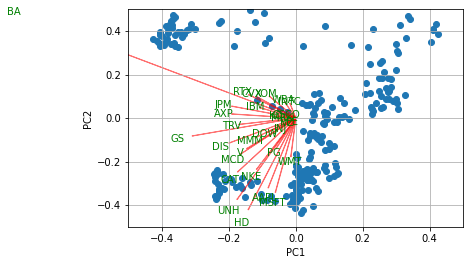

In [6]:
stockX = stockPCA.transform(stocks.iloc[:,1:31])
stockXnew = pd.DataFrame(stockX)
stockXnew

cnames = stocks.columns[1:31]

# plt.scatter(stockX[:,0], stockX[:,1])
# plt.xlabel("PC{}".format(1))
# plt.ylabel("PC{}".format(2))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1),
                    color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i],
                    color = 'g', ha = 'center', va = 'center')

plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(stockX[:,0:30], np.transpose(stockPCA.components_[0:30,:]), cnames)


## Q5(c)

In the plot, there are several clusters formed. One cluster in particular notably has low PC1 but high PC2 values. Stocks that are in that region include aircraft manufacturing companies like Boeing and Raytheon. Overall, stocks have a higher PC1 score with scores varying across high and low PC2.

## Q5(d)

In [7]:
stocks2019 = pd.read_csv("stock_data_2019.csv");
stock2019PCA = PCA()
stock2019PCA.fit(stocks2019.iloc[:,1:31])

stock2019PCAComps = pd.DataFrame(stock2019PCA.components_)
stock2019PCAComps.columns = ['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DD',
'GS','HD','IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE', 'PFE',
'PG','TRV','UNH','UTX','V','VZ','WBA','WMT','XOM']
stock2019PCAComps.index = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17',
'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27',
'PC28', 'PC29', 'PC30']
stock2019PCAComps

AAPL           AXP            BA           CAT          CSCO  \
PC1   0.620827  1.191109e-01 -2.251225e-01  4.240783e-02 -1.226343e-02   
PC2  -0.380151  6.455277e-02 -5.033261e-01 -2.558582e-01  2.700203e-02   
PC3   0.054541 -5.636087e-02 -6.923884e-01  6.833418e-02 -6.829245e-02   
PC4   0.251635 -2.856740e-01 -5.608836e-02 -6.884425e-02 -2.389641e-01   
PC5   0.163981  1.363362e-02 -4.088411e-01  1.675858e-01  1.484740e-01   
PC6  -0.288935  4.876812e-03 -1.421903e-01  7.185137e-02 -2.353412e-03   
PC7   0.179068  2.270828e-02 -1.028903e-02 -4.286663e-01 -3.571397e-02   
PC8  -0.074744  4.462155e-02 -1.767710e-02  2.644607e-01  6.924938e-02   
PC9   0.094865 -1.592116e-01  8.878965e-02 -1.072619e-01 -2.371876e-01   
PC10  0.014550  1.106665e-01  5.643769e-02 -2.358106e-01  6.616571e-02   
PC11 -0.028183 -1.517869e-01 -5.048587e-02 -2.444157e-01  1.346213e-02   
PC12  0.171585 -9.828627e-02 -1.856838e-02 -5.821945e-02  1.369883e-01   
PC13  0.250949  4.900128e-02  5.164517e-02 -1.408908e-01  8.448169e-02   
PC14  0.086106 -5.856535e-02  5.343990e-02  4.026139e-01  4.108922e-02   
PC15 -0.191720 -2.768359e-01  2.258672e-02 -2.192572e-02  2.494642e-02   
PC16  0.017382  2.475886e-01  4.863025e-02  3.241327e-02  1.723054e-01   
PC17 -0.215213 -1.814357e-01 -6.003664e-03  1.959323e-01 -5.736486e-02   
PC18  0.165832 -4.039287e-01  8.103486e-03  2.400657e-01 -7.574494e-02   
PC19 -0.063181  2.647203e-01  1.993980e-02  1.810001e-01  7.616806e-02   
PC20 -0.108032 -3.737830e-01  8.636154e-03 -2.405283e-01 -2.783844e-03   
PC21 -0.037053 -1.112464e-02 -3.213695e-06 -1.113126e-01  3.636409e-02   
PC22 -0.047167  9.657017e-02 -3.537060e-02 -5.725287e-02 -3.613133e-01   
PC23 -0.061450  1.621058e-01  5.925832e-03 -2.090441e-02  9.322513e-02   
PC24 -0.040851 -2.646961e-02  7.846376e-05  1.116717e-01 -5.125402e-01   
PC25 -0.064774  5.469139e-02 -1.835224e-02  2.818153e-01 -3.159528e-01   
PC26 -0.054153 -1.364207e-01 -2.847007e-02 -2.992959e-02 -8.936029e-02   
PC27  0.045579 -2.607281e-01  5.611973e-03 -6.467511e-02  4.447897e-02   
PC28  0.033404  3.251428e-01  1.474159e-02 -1.124281e-01 -2.970572e-01   
PC29 -0.000369  2.061160e-01  5.547839e-03 -1.015718e-01 -4.175928e-01   
PC30 -0.000000  3.470825e-16 -2.784088e-17  5.920914e-16  9.938106e-18   

               CVX           DIS            DD            GS            HD  \
PC1   7.211038e-03  2.103611e-01 -8.461702e-02  1.922594e-01  3.093909e-01   
PC2  -2.737849e-02  8.013827e-02 -4.740889e-02 -1.794304e-01  2.803296e-02   
PC3  -6.072050e-02 -1.136433e-02 -2.652439e-02 -1.131963e-02 -2.856733e-01   
PC4  -1.773484e-01 -3.225356e-01 -3.919256e-02 -1.190507e-01  2.861180e-01   
PC5   9.475578e-02 -4.741066e-02  1.533118e-01  1.540208e-02  9.026503e-03   
PC6   7.134574e-02 -1.319317e-01  1.754861e-01  4.051127e-01  4.148178e-01   
PC7   1.068014e-01 -5.675732e-01 -1.669950e-01 -1.729083e-01 -1.483722e-01   
PC8   9.690035e-02 -2.552028e-02  1.834662e-01 -5.877395e-01  4.580099e-01   
PC9  -2.468118e-01  4.568904e-01  1.528903e-01 -5.392587e-02 -2.048787e-01   
PC10  8.119146e-02  1.997976e-01 -1.836174e-01 -3.267661e-01  1.705077e-01   
PC11 -3.754044e-01  1.038056e-01 -1.066040e-01 -7.587901e-02  3.796402e-01   
PC12 -1.556001e-01  1.691418e-01  2.251411e-01 -3.813276e-01 -1.808055e-01   
PC13 -2.270817e-02 -1.851763e-01  6.211127e-01  8.454809e-02  7.587970e-02   
PC14 -1.947296e-01 -2.896799e-01 -1.698583e-01 -1.631313e-01 -1.330522e-01   
PC15 -1.403677e-01 -8.022167e-02  3.628023e-01  7.458685e-02 -9.775463e-02   
PC16 -1.512497e-01 -2.634833e-03 -2.479379e-01  1.547688e-01  8.781051e-02   
PC17 -4.212922e-01 -5.113943e-02 -8.155964e-02  1.605784e-02  8.741042e-02   
PC18  2.113037e-01  1.267086e-01 -2.667459e-01  4.741391e-02  2.042191e-02   
PC19  1.168783e-01 -3.138132e-02  2.147847e-02 -1.675447e-01 -1.087129e-01   
PC20  4.239188e-01  9.604306e-02 -5.490363e-02  3.282404e-03  1.262103e-01   
PC21 -2.213447e-01 -1.805932e-01 -1.647796e-01  5.547588e-02 -2.370595e-02   

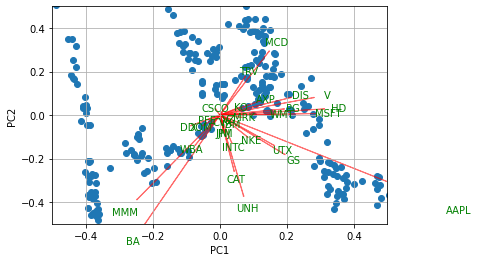

In [8]:
stock2019X = stock2019PCA.transform(stocks2019.iloc[:,1:31])
stock2019Xnew = pd.DataFrame(stock2019X)
stock2019Xnew.head()

cnames2019 = stocks2019.columns[1:31]

plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

myplot(stock2019X[:,0:30], np.transpose(stock2019PCA.components_[0:30,:]),
cnames2019)


The 2019 data is more varied overall in PC1 and PC2 scores, forming clusters in a "circular" manner. Manufacturing compnies in this case, such as 3M and Boeing, have low PC1 and PC2 scores. Tech companies like Apple, Microsoft and business companies like Goldman, Visa tend to have higher PC1 scores but not as high PC2 scores.

## Q6(a)

In [9]:
listFiles = [f for f in listdir("sotu/files/") if isfile(join("sotu/files/",
f))]
listFiles
# print(listFiles)

corpus = []
file_names = list()
for i in range(1,len(listFiles) + 1):
    file_path = "sotu/files/a%d.txt" % (i)
    file_name = "a%d.txt" % (i)
    file_names.append(file_name)
    # print(file_path)
    with open(file_path) as f:
        corpus.append(f.read().splitlines())
        f.close()

print(file_names)
for i in range(len(corpus)):
    corpus[i] = " ".join(corpus[i])

count = 0 
for speech in corpus:
     count += len(speech.split())
    
print('Total Documents:',len(corpus))
print('Mean Words per Document:', count / 231)

party = pd.read_csv("sotu/party.txt", header=None)
party.columns = ['party', 'president', 'year']
party




['a1.txt', 'a2.txt', 'a3.txt', 'a4.txt', 'a5.txt', 'a6.txt', 'a7.txt', 'a8.txt', 'a9.txt', 'a10.txt', 'a11.txt', 'a12.txt', 'a13.txt', 'a14.txt', 'a15.txt', 'a16.txt', 'a17.txt', 'a18.txt', 'a19.txt', 'a20.txt', 'a21.txt', 'a22.txt', 'a23.txt', 'a24.txt', 'a25.txt', 'a26.txt', 'a27.txt', 'a28.txt', 'a29.txt', 'a30.txt', 'a31.txt', 'a32.txt', 'a33.txt', 'a34.txt', 'a35.txt', 'a36.txt', 'a37.txt', 'a38.txt', 'a39.txt', 'a40.txt', 'a41.txt', 'a42.txt', 'a43.txt', 'a44.txt', 'a45.txt', 'a46.txt', 'a47.txt', 'a48.txt', 'a49.txt', 'a50.txt', 'a51.txt', 'a52.txt', 'a53.txt', 'a54.txt', 'a55.txt', 'a56.txt', 'a57.txt', 'a58.txt', 'a59.txt', 'a60.txt', 'a61.txt', 'a62.txt', 'a63.txt', 'a64.txt', 'a65.txt', 'a66.txt', 'a67.txt', 'a68.txt', 'a69.txt', 'a70.txt', 'a71.txt', 'a72.txt', 'a73.txt', 'a74.txt', 'a75.txt', 'a76.txt', 'a77.txt', 'a78.txt', 'a79.txt', 'a80.txt', 'a81.txt', 'a82.txt', 'a83.txt', 'a84.txt', 'a85.txt', 'a86.txt', 'a87.txt', 'a88.txt', 'a89.txt', 'a90.txt', 'a91.txt', 'a92.tx

party    president  year
0       n   washington  1790
1       n   washington  1790
2       n   washington  1791
3       n   washington  1792
4       n   washington  1793
..    ...          ...   ...
226     d        obama  2013
227     d        obama  2014
228     d        obama  2015
229     d        obama  2016
230     r        trump  2017

[231 rows x 3 columns]

## Q6(b)

In [10]:
# nltk.download('stopwords')
nltk.download('punkt')

# stop_words = set(nltk.corpus.stopwords.words('english'))

with open("sotu/stopwords.txt") as f:
    stop_words = f.read().lower().splitlines()
    f.close()

print(stop_words)

corpusNew = list()
for i in range(0, len(corpus)):
    tokens = nltk.tokenize.word_tokenize(corpus[i])
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    corpusNew.append(' '.join(words))

corpusNew

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['a', 'able', 'about', 'above', 'abroad', 'according', 'accordingly', 'across', 'actually', 'adj', 'after', 'afterwards', 'again', 'against', 'ago', 'ahead', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'alongside', 'already', 'also', 'although', 'always', 'am', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', "a's", 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'back', 'backward', 'backwards', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', 'came', 'can', 'cannot',

['embrace great satisfaction opportunity presents congratulating present favorable prospects public affairs accession important state north carolina constitution united states official information received rising credit respectability country general increasing good government union concord peace plenty blessed circumstances auspicious eminent degree national prosperity resuming consultations general good derive encouragement reflection measures session satisfactory constituents novelty difficulty work allowed hope realize expectations secure blessings gracious providence reach present important session call cool deliberate exertion patriotism firmness wisdom interesting objects engage attention providing common defense merit regard prepared war effectual means preserving peace free people armed disciplined uniform welldigested plan requisite safety interest require promote manufactories tend render independent essential military supplies proper establishment troops deemed indispensabl

## Q6(c)
### Q6(c)(i)

In [11]:
party['doc'] = corpusNew
party['filename'] = file_names

party = party[(party.party == 'r') | (party.party == 'd') ]


In [12]:
corpusStripped = party['doc'].tolist()
corpusStripped

file_names_stripped = party['filename'].tolist()

vectorizer = CountVectorizer(input='content')
X = vectorizer.fit_transform(corpusStripped)

Xframe = pd.DataFrame(X.toarray(), index=file_names_stripped, 
                        columns=vectorizer.get_feature_names())

Xframe.iloc[0:10,0:5]

aaa  aana  aaron  abandon  abandoned
a41.txt    0     0      0        1          1
a42.txt    0     0      0        0          1
a43.txt    0     0      0        0          3
a44.txt    0     0      0        2          0
a45.txt    0     0      0        0          0
a46.txt    0     0      0        2          0
a47.txt    0     0      0        1          0
a48.txt    0     0      0        0          0
a49.txt    0     0      0        0          2
a50.txt    0     0      0        0          2

In [13]:
count = Xframe.sum()
fwords = count.sort_values(ascending=False)
# fwords[0:3000]
fwords_label = fwords.index[0:3000]
print(fwords_label)

XframeNew = Xframe[fwords_label]
XframeNew['party_affil'] = party['party'].tolist()
XframeNew['pres_name'] = party['president'].tolist()
XframeNew['year_speech'] = party['year'].tolist()
XframeBi = XframeNew.copy()
XframeBi.iloc[:,0:3000] = XframeBi.iloc[:,0:3000].astype('bool')
XframeBi.iloc[:,0:3000] = XframeBi.iloc[:,0:3000].astype('int')

Index(['government', 'states', 'congress', 'united', 'people', 'year',
       'country', 'great', 'public', 'time',
       ...
       'sooner', 'granada', 'domination', 'exceptions', 'didnt', 'lakes',
       'kindly', 'effectual', 'bolivia', 'manufacturer'],
      dtype='object', length=3000)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

### Q6(c)(ii)

In [14]:
enc = OrdinalEncoder()
enc.fit(XframeBi[['party_affil']])
XframeBi[['party_affil']] = enc.transform(XframeBi[['party_affil']])

# XframeNew.iloc[0:10,2995:3003]

train = XframeBi[(XframeBi.year_speech != 1962) &
(XframeBi.year_speech != 1995) & (XframeBi.year_speech != 2006) &
(XframeBi.year_speech != 2014) & (XframeBi.year_speech != 2017)]
test = XframeBi[(XframeBi.year_speech == 1962) |
(XframeBi.year_speech == 1995) | (XframeBi.year_speech == 2006) |
(XframeBi.year_speech == 2014) | (XframeBi.year_speech == 2017)]

# test.iloc[0:5,2998:3003]
# TD matrix used for x
# Party used for y
x_party_train = train.iloc[: ,0:3000]
y_party_train = train['party_affil']

x_party_test = test.iloc[:, 0:3000]
y_party_test = test['party_affil']

bnb = BernoulliNB()
bnb.fit(x_party_train, y_party_train)

y_party_pred_bi = bnb.predict_proba(x_party_test)
y_party_pred_bi




array([[9.99999963e-01, 3.74814803e-08],
       [1.00000000e+00, 2.74067120e-25],
       [1.00000000e+00, 4.67676214e-20],
       [1.00000000e+00, 2.17751678e-29],
       [1.00000000e+00, 1.89627586e-21]])

### Q6(c)(iii)

In [15]:
# enc.fit(XframeNew[['party_affil']])
# XframeNew[['party_affil']] = enc.transform(XframeNew[['party_affil']])

# XframeNew.iloc[0:10,2995:3003]


# train = XframeNew[(XframeNew.year_speech != 1962) & (XframeNew.year_speech != 1995) & (XframeNew.year_speech != 2006) & (XframeNew.year_speech != 2014) & (XframeNew.year_speech != 2017)]
# test = XframeNew[(XframeNew.year_speech == 1962) | (XframeNew.year_speech == 1995) | (XframeNew.year_speech == 2006) | (XframeNew.year_speech == 2014) | (XframeNew.year_speech == 2017)]

# test.iloc[0:5,2998:3003]
# x_party_train = train.iloc[: ,0:3000]
# y_party_train = train['party_affil']

# x_party_test = test.iloc[:, 0:3000]
# y_party_test = test['party_affil']

mnb = MultinomialNB()
mnb.fit(x_party_train, y_party_train)

y_party_pred_mult = mnb.predict_proba(x_party_test)
y_party_pred_mult


array([[9.99805672e-01, 1.94328264e-04],
       [9.99999999e-01, 6.96197587e-10],
       [9.99997823e-01, 2.17675030e-06],
       [1.00000000e+00, 6.61986601e-16],
       [9.99775428e-01, 2.24572028e-04]])